In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
#load data
hotel_data = pd.read_csv(r'C:\Users\Gurma\Documents\GA Tech OMSA Courses\MGT 6203\R code_files\Hotel_Data2.csv')


In [3]:
#read first few rows of data
pd.set_option('display.max_columns', None)

hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [20]:
# need to convert hotel column to numeric
hotel_data['hotel'].replace(['Resort Hotel','City Hotel'],
                        [0, 1], inplace=True)

In [21]:
# need to convert deposit_type column to numeric
hotel_data['deposit_type'].replace(['No Deposit','Non Refund','Refundable'],
                        [0, 1,2], inplace=True)

In [40]:
#define predictor and response variables for logistic regression model
predictor = hotel_data[['hotel','deposit_type','lead_time','total_of_special_requests']]
response = hotel_data['is_canceled']

#split data into training (70%) and testing(30%)
predictor_train,predictor_test,response_train,response_test = train_test_split(predictor, response,test_size = 0.3, random_state=0)



In [41]:
#now we can use LogisticRegression function to fit logisctic regression model
log_regression = LogisticRegression()
log_regression.fit(predictor_train,response_train)
# use model to make predictions on test data
response_pred = log_regression.predict(predictor_test)


In [42]:
# create confusion matrix
matrix = metrics.confusion_matrix(response_test,response_pred)
matrix

array([[21697,   608],
       [ 8480,  4912]], dtype=int64)

From the confusion matrix we have 21,697 as True Positives

In [46]:
# lets see the accuracy of this model
print("Accuracy:",metrics.accuracy_score(response_test, response_pred))

Accuracy: 0.7454127797854161


We can now look at AUC plot to see the area under the curve. The higher the area the more accurate our model predicts the response.

In [47]:
#define AUC metrics
response_pred_prob = log_regression.predict_proba(predictor_test)[::,1]

fpr, tpr,_ = metrics.roc_curve(response_test, response_pred_prob)

auc = metrics.roc_auc_score(response_test,response_pred_prob)

<function matplotlib.pyplot.show(close=None, block=None)>

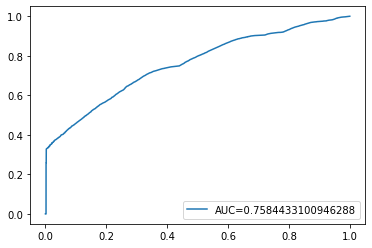

In [48]:
#lets create the ROC plot
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show